## Visualize UMAP for CP and DP morphology features

In [1]:
suppressPackageStartupMessages(library(ggplot2))
suppressPackageStartupMessages(library(dplyr))

In [2]:
# Set paths
umap_dir <- file.path("..", "..", "data")
umap_cp_file <- file.path(umap_dir, "norm_fs_embeddings_cp.csv.gz")
umap_dp_file <- file.path(umap_dir, "norm_fs_embeddings_dp_nuc.csv.gz")

output_fig_dir <- "figures"

umap_cp_fig <- file.path(output_fig_dir, "umap_cp.png")
umap_dp_fig <- file.path(output_fig_dir, "umap_dp.png")

## Visualize CP embeddings

In [3]:
# Load data
umap_cp_df <- readr::read_csv(
    umap_cp_file,
    col_types = readr::cols(
        .default = "d",
        Metadata_Well = "c",
        Metadata_WellRow = "c",
        Metadata_gene_name = "c",
        Metadata_genotype = "c"
    )
)

print(dim(umap_cp_df))
head(umap_cp_df, 3)

[1] 149  14


Metadata_WellRow,Metadata_WellCol,Metadata_number_of_singlecells,Metadata_gene_name,Metadata_genotype,Metadata_ImageNumber,Metadata_Plate,Metadata_Well,Metadata_Cytoplasm_Parent_Cells,Metadata_Cytoplasm_Parent_OrigNuclei,Metadata_Cells_Number_Object_Number,Metadata_Nuclei_Number_Object_Number,UMAP1,UMAP2
<chr>,<dbl>,<dbl>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
C,6,12,NF1,WT,1,1,C6,1,4,1,4,11.63846,-2.359264
C,6,12,NF1,WT,1,1,C6,2,5,2,5,11.90173,-2.993272
C,6,12,NF1,WT,1,1,C6,3,7,3,7,11.51752,-2.876570


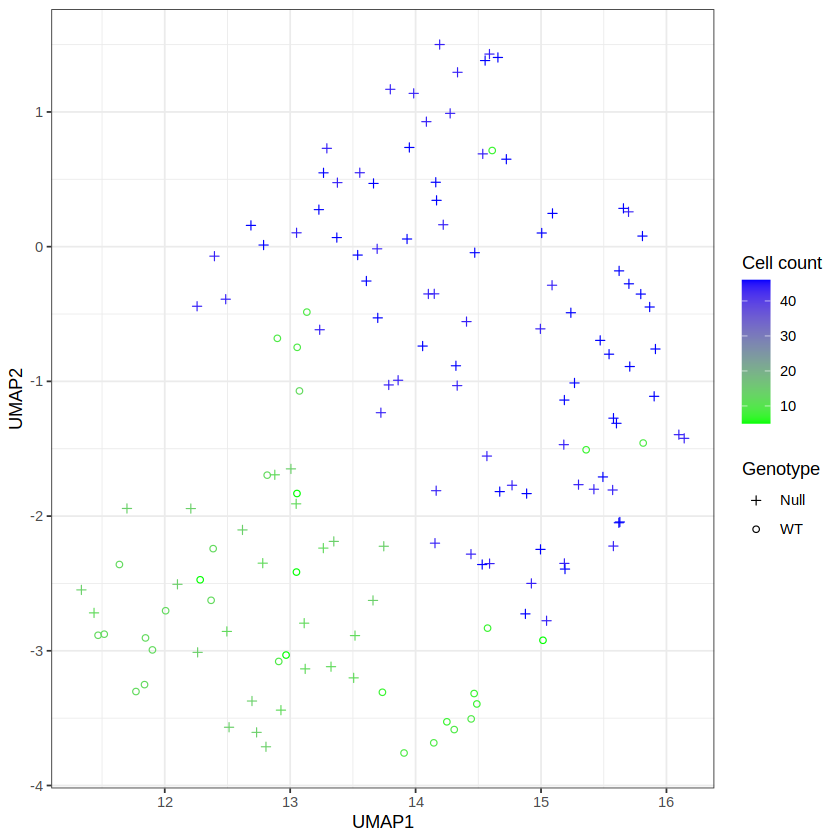

In [4]:
umap_cp_gg <- (
    ggplot(umap_cp_df, aes(x = UMAP1, y = UMAP2))
    + geom_point(
        aes(
            color = Metadata_number_of_singlecells,
            shape = Metadata_genotype
        )
    )
    + scale_shape_manual(name = "Genotype", values = c(3, 1))
    + scale_color_gradient(name = "Cell count", low = "green", high = "blue")
    + theme_bw()
)

umap_cp_gg

In [5]:
# Output figure
ggsave(umap_cp_fig, umap_cp_gg, dpi = 500, height = 6, width = 6)

## Visualize DP Embeddings

In [6]:
# Load data
umap_dp_df <- readr::read_csv(
    umap_dp_file,
    col_types = readr::cols(
        .default = "d",
        Metadata_Well = "c",
        Metadata_Genotype = "c",
        Metadata_Genotype_Replicate = "c",
        Metadata_Model = "c",
        Metadata_Plate_Map_Name = "c",
        Metadata_Actin = "c",
        Metadata_DNA = "c",
        Metadata_ER = "c"
    )
)

print(dim(umap_dp_df))
head(umap_dp_df, 3)

[1] 257  15


Location_Center_X,Location_Center_Y,Metadata_number_of_singlecells,Metadata_Plate,Metadata_Well,Metadata_Site,Metadata_Plate_Map_Name,Metadata_DNA,Metadata_ER,Metadata_Actin,Metadata_Genotype,Metadata_Genotype_Replicate,Metadata_Model,UMAP1,UMAP2
<dbl>,<dbl>,<dbl>,<dbl>,<chr>,<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>
652.8684,760.5526,7,1,D6,3,1_D6_3,../../../../1_preprocessing_data/Corrected_Images/D6_01_1_3_DAPI_001_IllumCorrect.tif,../../../../1_preprocessing_data/Corrected_Images/D6_01_2_3_GFP_001_IllumCorrect.tif,../../../../1_preprocessing_data/Corrected_Images/D6_01_3_3_RFP_001_IllumCorrect.tif,WT,1,efficientnet,4.264595,6.184330
451.9565,477.6826,7,1,D6,2,1_D6_2,../../../../1_preprocessing_data/Corrected_Images/D6_01_1_2_DAPI_001_IllumCorrect.tif,../../../../1_preprocessing_data/Corrected_Images/D6_01_2_2_GFP_001_IllumCorrect.tif,../../../../1_preprocessing_data/Corrected_Images/D6_01_3_2_RFP_001_IllumCorrect.tif,WT,1,efficientnet,4.122251,3.966355
528.9257,563.6287,7,1,D6,2,1_D6_2,../../../../1_preprocessing_data/Corrected_Images/D6_01_1_2_DAPI_001_IllumCorrect.tif,../../../../1_preprocessing_data/Corrected_Images/D6_01_2_2_GFP_001_IllumCorrect.tif,../../../../1_preprocessing_data/Corrected_Images/D6_01_3_2_RFP_001_IllumCorrect.tif,WT,1,efficientnet,5.334163,4.959183


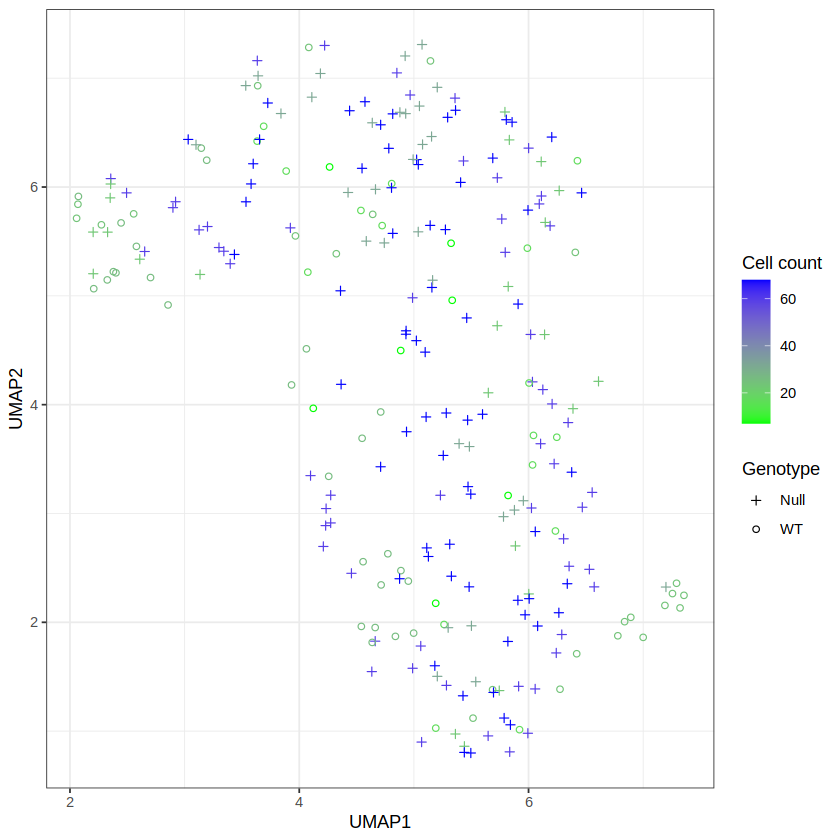

In [7]:
umap_dp_gg <- (
    ggplot(umap_dp_df, aes(x = UMAP1, y = UMAP2))
    + geom_point(
        aes(
            color = Metadata_number_of_singlecells,
            shape = Metadata_Genotype
        )
    )
    + scale_shape_manual(name = "Genotype", values = c(3, 1))
    + scale_color_gradient(name = "Cell count", low = "green", high = "blue")
    + theme_bw()
)

umap_dp_gg

In [8]:
# Output figure
ggsave(umap_dp_fig, umap_dp_gg, dpi = 500, height = 6, width = 6)